Enter the name of sheet : Sheet1
Enter the name of first subject : Eng1
Enter the name of second subject : Eng2
For first term
count    22.000000
mean     57.141725
std      17.855215
min      26.125641
25%      45.295513
50%      57.812821
75%      72.605128
max      85.366667
Name: Eng1, dtype: float64
          
For second second
count    22.000000
mean     62.427273
std      15.748596
min      35.500000
25%      52.650000
50%      62.000000
75%      75.025000
max      87.400000
Name: Eng2, dtype: float64
          
FOR t-TEST
Here alpha=  0.05
t=-1.041, df=42, cv=1.682, p=0.304
Since p>alpha, we Accept the null hypothesis that there is no statistically significant difference 
between the marks of two terms.


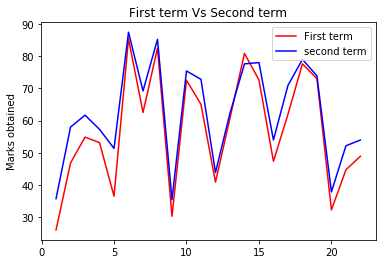

In [5]:
# t-test for independent samples
# %matplotlib ipympl
%matplotlib inline
from matplotlib import pyplot as plt
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
from scipy import stats
import pandas as pd
import numpy as np

# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = mean(data1), mean(data2)
	# calculate standard errors
	se1, se2 = sem(data1), sem(data2)
	# standard error on the difference between the samples
	sed = sqrt(se1**2.0 + se2**2.0)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = len(data1) + len(data2) - 2
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p

# seed the random number generator
seed(1)
# generate two independent samples
#data1 = 5 * randn(100) + 50
#data2 = 5 * randn(100) + 51
Sheet=input('Enter the name of sheet : ')
df1=pd.read_excel("D:what.xlsx",sheet_name=Sheet)
Subject1=input('Enter the name of first subject : ')
Subject2=input('Enter the name of second subject : ')
data1=df1[Subject1]
data2=df1[Subject2]
print('For first term')
print(data1.describe())
print('          ')
print('For second second')
print(data2.describe())
print('          ')
print('FOR t-TEST')
# calculate the t test
alpha = 0.05
print('Here alpha= ',alpha)
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
# if abs(t_stat) <= cv:
# 	print('Accept null hypothesis that the means are equal.')
# else:
# 	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value

if p < alpha:
    print("Since p<alpha, test concludes that there is a statistically significant difference between the marks of two terms.")
    if mean(data2)-mean(data1)>0:
        print('There is significant increase.')
    elif mean(data2)-mean(data1)==0:
        print('No increase or decrease.')
    else:
        print('There is significant decrease.')
else:
    print('Since p>alpha, we Accept the null hypothesis that there is no statistically significant difference \nbetween the marks of two terms.')

plt.plot(list(range(1, len(data1)+1)),data1,color='r',label='First term')
plt.plot(list(range(1, len(data2)+1)),data2,color='b',label='second term')
plt.title('First term Vs Second term')
plt.xlabel('')
plt.ylabel('Marks obtained')

plt.legend();    
